In [1]:
import pandas as pd
import gensim

In [2]:
import numpy as np
import cleantext

In [3]:
import re 
import contractions

In [4]:
from nltk.corpus import stopwords

In [5]:
df = pd.read_csv('train.csv')

In [6]:
df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [7]:
df.shape

(7613, 5)

In [8]:
df.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [9]:
 df.fillna('missing',inplace=True)

In [10]:
df.isnull().sum()

id          0
keyword     0
location    0
text        0
target      0
dtype: int64

In [11]:

df['target'].value_counts()

0    4342
1    3271
Name: target, dtype: int64

## Text Cleaning 

In [46]:
df['text'][3]

'13,000 people receive #wildfires evacuation orders in California '

In [49]:
def clean_text(text):
    # Handling contractions
    text = contractions.fix(text)
    # Clean text inbuilt function
    text = cleantext.clean(text, no_digits=True,replace_with_digit='',no_punct=True,no_currency_symbols=True)
    # Remove # values
    text = re.sub(r'#\w+','',text)
    text = text.split(' ')
    text = [word for word in text if word not in stopwords.words('english')]
    text = ' '.join(text)
    return text

In [51]:
df['text'] = df['text'].apply(lambda x: clean_text(x))

In [52]:
df['text'][3]

'people receive wildfires evacuation orders california'

## Creating word embedding for each sentence

In [ ]:
# # One time run command 
# !python -m spacy download en

In [ ]:
# # One time run command 
# !python -m spacy download en_vectors_web_lg

In [18]:
import spacy

nlp = spacy.load('en_vectors_web_lg')
total_vectors = len(nlp.vocab.vectors)

print('Total word vectors:', total_vectors)

Total word vectors: 1070971


In [19]:
# Embedding Length 
nlp.vocab.vectors_length

300

In [53]:
def sentence_embedding(text):
    word_list = list(set(text.split(' ')))
    word_vector = nlp(word_list[0]).vector
    n = len(word_list)
    for word in word_list[1:]:
        word_vector += np.array(nlp(word).vector)
    final_vector = word_vector/n
    return np.array(final_vector)

In [54]:
l = []
for i in df['text']:
    l.append(sentence_embedding(i))

In [55]:
len(l)

7613

In [56]:
word_embedding_df = pd.DataFrame(l)


In [57]:
word_embedding_df.head(5)

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,-0.462142,0.052778,-0.147526,-0.022433,-0.065914,-0.163390,-0.084180,0.149339,0.007110,2.059819,...,-0.315468,0.186460,-0.325243,-0.014464,0.361223,-0.134999,0.008728,0.176468,-0.029409,-0.144857
1,-0.014817,-0.092123,-0.107169,-0.338657,0.322136,0.048467,0.321796,-0.062403,-0.188868,1.100879,...,-0.000271,0.066260,0.135487,0.009727,0.243807,0.165720,-0.062201,-0.115065,-0.260096,0.124245
2,0.046859,0.066338,-0.020495,-0.047279,-0.174517,-0.160648,-0.019068,0.017220,-0.016927,2.809466,...,-0.229352,0.030798,0.291578,0.026442,-0.054712,-0.200036,-0.222045,0.130568,0.184944,-0.079101
3,-0.226582,0.198884,-0.027298,-0.249695,-0.169410,-0.059459,-0.052042,0.202244,0.039382,2.036350,...,-0.284480,0.263769,0.177242,-0.038433,-0.046832,-0.211249,-0.077434,-0.031381,0.162820,-0.051293
4,-0.158721,-0.086279,0.112909,-0.068443,-0.019881,0.102134,-0.081687,-0.034499,-0.050314,1.590501,...,-0.045970,0.211298,0.146740,0.180153,0.105765,-0.078480,-0.094092,-0.133159,-0.052387,0.109360


In [58]:
word_embedding_df.to_csv('word_embedding_train_file.csv',index=False)

## Creating Features for the whole dataset

In [12]:
embedding_df = pd.read_csv('word_embedding_train_file.csv')
embedding_df.head(2)

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,-0.462142,0.052778,-0.147526,-0.022433,-0.065914,-0.163390,-0.084180,0.149339,0.007110,2.059819,...,-0.315468,0.18646,-0.325243,-0.014464,0.361223,-0.134999,0.008728,0.176468,-0.029409,-0.144857
1,-0.014817,-0.092123,-0.107169,-0.338657,0.322136,0.048467,0.321796,-0.062403,-0.188868,1.100879,...,-0.000271,0.06626,0.135487,0.009727,0.243807,0.165720,-0.062201,-0.115065,-0.260096,0.124245


In [13]:
df.head()

,id,keyword,location,text,target
0,1,missing,missing,Our Deeds are the Reason of this #earthquake M...,1
1,4,missing,missing,Forest fire near La Ronge Sask. Canada,1
2,5,missing,missing,All residents asked to 'shelter in place' are ...,1
3,6,missing,missing,"13,000 people receive #wildfires evacuation or...",1
4,7,missing,missing,Just got sent this photo from Ruby #Alaska as ...,1


## Creating mean features for keyword and location columns
### mean_feature_value = true target values per class / total values per class

In [14]:
total_values_per_keyword = dict(df['keyword'].value_counts())

total_values_per_keyword

{'missing': 61,
 'fatalities': 45,
 'armageddon': 42,
 'deluge': 42,
 'sinking': 41,
 'harm': 41,
 'damage': 41,
 'body%20bags': 41,
 'evacuate': 40,
 'collided': 40,
 'siren': 40,
 'windstorm': 40,
 'twister': 40,
 'outbreak': 40,
 'fear': 40,
 'wrecked': 39,
 'earthquake': 39,
 'explosion': 39,
 'weapon': 39,
 'wreckage': 39,
 'flames': 39,
 'sinkhole': 39,
 'derailment': 39,
 'famine': 39,
 'sunk': 39,
 'collision': 39,
 'hellfire': 39,
 'whirlwind': 39,
 'weapons': 39,
 'ambulance': 38,
 'thunder': 38,
 'fire': 38,
 'drowned': 38,
 'injury': 38,
 'flooding': 38,
 'deaths': 38,
 'bombed': 38,
 'hurricane': 38,
 'fatal': 38,
 'derailed': 38,
 'blaze': 38,
 'explode': 38,
 'typhoon': 38,
 'oil%20spill': 38,
 'upheaval': 38,
 'destroy': 37,
 'blizzard': 37,
 'wounded': 37,
 'burning%20buildings': 37,
 'mudslide': 37,
 'quarantined': 37,
 'sandstorm': 37,
 'hostages': 37,
 'crush': 37,
 'ruin': 37,
 'bioterror': 37,
 'pandemonium': 37,
 'police': 37,
 'emergency': 37,
 'panic': 37,
 'cu

In [15]:
true_target_values_per_keyword = df[df['target']==1][['target','keyword']].groupby('keyword').count()

true_target_values_per_keyword = true_target_values_per_keyword.to_dict()['target']

In [16]:
true_target_values_per_keyword['missing']

42

In [17]:
mean_feature_dict = {}
for keyword in total_values_per_keyword.keys():
    try:
        mean_feature_dict[keyword] = np.round(true_target_values_per_keyword[keyword]/total_values_per_keyword[keyword],2)
    except:
        mean_feature_dict[keyword] = 0

In [18]:
mean_feature_dict

{'missing': 0.69,
 'fatalities': 0.58,
 'armageddon': 0.12,
 'deluge': 0.14,
 'sinking': 0.2,
 'harm': 0.1,
 'damage': 0.46,
 'body%20bags': 0.02,
 'evacuate': 0.62,
 'collided': 0.57,
 'siren': 0.12,
 'windstorm': 0.4,
 'twister': 0.12,
 'outbreak': 0.98,
 'fear': 0.12,
 'wrecked': 0.08,
 'earthquake': 0.77,
 'explosion': 0.51,
 'weapon': 0.36,
 'wreckage': 1.0,
 'flames': 0.33,
 'sinkhole': 0.69,
 'derailment': 1.0,
 'famine': 0.67,
 'sunk': 0.23,
 'collision': 0.74,
 'hellfire': 0.18,
 'whirlwind': 0.36,
 'weapons': 0.44,
 'ambulance': 0.53,
 'thunder': 0.32,
 'fire': 0.29,
 'drowned': 0.39,
 'injury': 0.29,
 'flooding': 0.66,
 'deaths': 0.68,
 'bombed': 0.5,
 'hurricane': 0.53,
 'fatal': 0.68,
 'derailed': 0.68,
 'blaze': 0.13,
 'explode': 0.08,
 'typhoon': 0.97,
 'oil%20spill': 0.97,
 'upheaval': 0.16,
 'destroy': 0.24,
 'blizzard': 0.11,
 'wounded': 0.7,
 'burning%20buildings': 0.57,
 'mudslide': 0.32,
 'quarantined': 0.38,
 'sandstorm': 0.76,
 'hostages': 0.73,
 'crush': 0.11,
 

In [19]:
df['keyword'] = df['keyword'].apply(lambda x : mean_feature_dict[x])

In [20]:
df.head()

,id,keyword,location,text,target
0,1,0.69,missing,Our Deeds are the Reason of this #earthquake M...,1
1,4,0.69,missing,Forest fire near La Ronge Sask. Canada,1
2,5,0.69,missing,All residents asked to 'shelter in place' are ...,1
3,6,0.69,missing,"13,000 people receive #wildfires evacuation or...",1
4,7,0.69,missing,Just got sent this photo from Ruby #Alaska as ...,1


## Combining features to form complete processed df

In [21]:
embedding_df['keyword'] = df['keyword']
embedding_df['target'] = df['target']

In [22]:
embedding_df.head(2)

,0,1,2,3,4,5,6,7,8,9,...,292,293,294,295,296,297,298,299,keyword,target
0,-0.462142,0.052778,-0.147526,-0.022433,-0.065914,-0.163390,-0.084180,0.149339,0.007110,2.059819,...,-0.325243,-0.014464,0.361223,-0.134999,0.008728,0.176468,-0.029409,-0.144857,0.69,1
1,-0.014817,-0.092123,-0.107169,-0.338657,0.322136,0.048467,0.321796,-0.062403,-0.188868,1.100879,...,0.135487,0.009727,0.243807,0.165720,-0.062201,-0.115065,-0.260096,0.124245,0.69,1


In [23]:
embedding_df.shape

(7613, 302)

## Saving our final feature dataframe to disk

In [24]:
embedding_df.to_csv('final_train_set.csv',index=False)

# Let's Start Training

In [25]:
import torch

from torch.utils.data import TensorDataset, DataLoader

from torch import nn

import torch.nn.functional as F

from torch import optim

In [53]:
# Defining hyperparameters
bs = 128
loss_func = F.cross_entropy


### Using 2 layer network architecture 

In [91]:
class ModelClass(nn.Module):
    def __init__(self, fan_in):
        super().__init__()
        self.fc1 = nn.Linear(fan_in, 64)
        nn.init.kaiming_uniform_(self.fc1.weight, nonlinearity='relu')

        self.fc2 = nn.Linear(64, 2)
        
    def forward(self, xb):
        z1 = self.fc1(xb)
        a1 = F.relu(z1)
        
        return self.fc2(a1)

## Using Adam Optimiser this time 

In [88]:
# Get model and optimiser 
def get_model(in_features, lr=0.005):
    model = ModelClass(in_features)
    opt = optim.Adam(model.parameters(),lr=lr) # tune this for improving model performance
    return model, opt

In [29]:
# Get Data Function
def to_tensor(X,y):
    return TensorDataset(torch.tensor(X), torch.tensor(y))

In [32]:
X = embedding_df.drop('target',axis=1)
Y = embedding_df['target']

In [33]:
# Splitting train and test set from the whole data 
from sklearn.model_selection import train_test_split


In [34]:
train_x, test_x , train_y, test_y = train_test_split(X,Y, test_size = 0.20, random_state=100, stratify= Y)

In [36]:
train_x.shape, test_x.shape, train_y.shape,  test_y.shape

((6090, 301), (1523, 301), (6090,), (1523,))

In [38]:
train_dl = DataLoader(to_tensor(np.array(train_x),np.array(train_y)),batch_size=bs, shuffle=True)
valid_dl = DataLoader(to_tensor(np.array(test_x),np.array(test_y)),batch_size=2*bs)

In [94]:
# Getting optimiser and model 
genre_model, Opt = get_model(301, lr=0.0001)

In [95]:
scheduler = optim.lr_scheduler.ReduceLROnPlateau(Opt, factor=0.1, patience=10)
loss_train, loss_valid = [], []

for epoch in range(100):
    genre_model.train()
    train_loss = 0
    for xb, yb in train_dl:
        pred = genre_model(xb.float())
        loss = loss_func(pred, yb)

        Opt.zero_grad()
        loss.backward()
        Opt.step()
        train_loss += loss.item()
    loss_train.append(loss/len(train_dl))
        
    
    genre_model.eval()
    with torch.no_grad():
        valid_loss = sum(loss_func(genre_model(xb.float()), yb) for xb, yb in valid_dl)
        loss_valid.append(valid_loss)
    if (epoch+1)%10==0:
        print("Epoch {}:  Train Loss: {} Validation Loss: {}".format(epoch+1,loss_train[epoch] ,valid_loss / len(valid_dl)))
    scheduler.step(valid_loss)

Epoch 10:  Train Loss: 0.011314221657812595 Validation Loss: 0.5087879300117493
Epoch 20:  Train Loss: 0.008273358456790447 Validation Loss: 0.4841863811016083
Epoch 30:  Train Loss: 0.008754896931350231 Validation Loss: 0.47337308526039124
Epoch 40:  Train Loss: 0.008490222506225109 Validation Loss: 0.4665015637874603
Epoch 50:  Train Loss: 0.007522348314523697 Validation Loss: 0.46242043375968933
Epoch 60:  Train Loss: 0.010117593221366405 Validation Loss: 0.4600246250629425
Epoch 70:  Train Loss: 0.008472609333693981 Validation Loss: 0.4581628739833832
Epoch 80:  Train Loss: 0.005028448533266783 Validation Loss: 0.45706185698509216
Epoch 90:  Train Loss: 0.008832870051264763 Validation Loss: 0.456672340631485
Epoch 100:  Train Loss: 0.0072457133792340755 Validation Loss: 0.4565759599208832


In [96]:
import matplotlib.pyplot as plt

Text(0.5, 0, 'epoch')

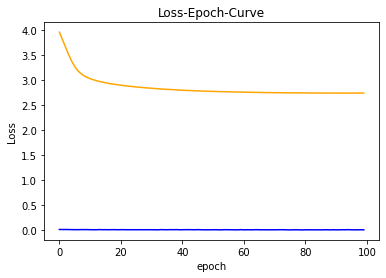

In [97]:
plt.title('Loss-Epoch-Curve')
plt.plot(loss_train,color="Blue")
plt.plot(loss_valid,color="Orange")
plt.ylabel("Loss")
plt.xlabel("epoch")